## Applied

### 8

1. This question involves the use of simple linear regression on the Auto data set.
    1. Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output.
    
     For example:
     
        1. Is there a relationship between the predictor and the response?
        1. How strong is the relationship between the predictor and the response?
        1. Is the relationship between the predictor and the response positive or negative?
        1. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
        
    1. Plot the response and the predictor. Use the abline() function to display the least squares regression line.
    1. Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

#### Answers

##### a)

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

PATH = './data/'
auto = pd.read_csv(f'{PATH}Auto.csv',sep=',')
auto.loc[auto['horsepower'] == '?','horsepower'] = np.nan
auto['horsepower'] = auto['horsepower'].astype(float)
auto.dropna(inplace=True)
auto.reset_index(inplace=True,drop=True)

In [66]:
y = auto['mpg']
X = auto['horsepower']
X = sm.add_constant(X)

mod = sm.OLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           7.03e-81
Time:                        15:05:11   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a strong negative relationship between the predictor and the response. The p-value is close to 0.

In [65]:
x = np.array([98])
x = sm.add_constant(x, has_constant='add')
mod.predict(x)

array([24.46707715])

##### b)

In [77]:
import matplotlib.pyplot as plt
sns.set_style('white')
plt.xkcd();

/home/florian/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


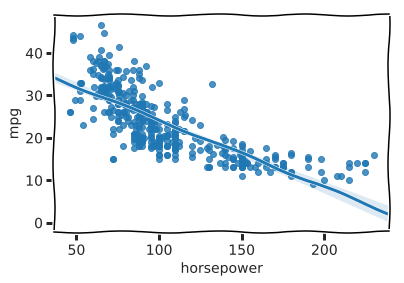

In [78]:
sns.regplot(x='horsepower', y='mpg', data=auto)

##### c)

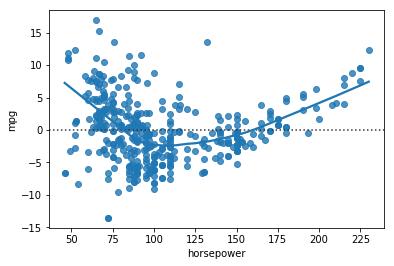

In [75]:
sns.residplot(x='horsepower', y='mpg', data=auto, lowess=True)

There is a strong pattern in the data which indicates a non-linearity. The fit should include a quadratic transformation.